### Import the relevant libraries

In [38]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf

#### Data generation

In [39]:
observation = 1000

xs = np.random.uniform(low=-10, high=10, size=(observation,1))
zs = np.random.uniform(low=-10, high=10, size=(observation,1))

generate_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1,(observation,1))
generate_targets = 2* xs - 3*zs + 5 + noise

#np.savez('TF_intro', inputs=generate_inputs, targets=generate_targets)

#### Solving with TensorFlow

In [40]:
input_size = 2
output_size = 1


#### Outlining the model

In [41]:
inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.float32, [None, output_size])

weights = tf.Variable(tf.random_uniform([input_size,output_size], minval=-0.1, maxval=0.1))
biases = tf.Variable(tf.random_uniform([output_size], minval=-0.1, maxval=0.1))


outputs = tf.matmul(inputs, weights) * biases


#### Choosing the objective function and the optimization method

In [42]:
mean_loss = tf.losses.mean_squared_error(labels=targets, predictions=outputs) / 2.

optimize = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(mean_loss)


#### Prepare the execution

In [43]:
sess = tf.InteractiveSession()

c:\Users\assis\anaconda3\envs\py36\lib\site-packages\tensorflow_core\python\client\session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


#### Initializing variables

In [44]:
initializer = tf.global_variables_initializer()

sess.run(initializer)


#### Loading the data

In [45]:
training_data = np.load('TF_intro.npz')

#### Learning

In [46]:
for e in range(100):
    _, curr_loss = sess.run([optimize, mean_loss],
                            feed_dict = {inputs: training_data['inputs'], targets: training_data['targets']})
    

    print(curr_loss)


232.03444
212.61552
443.26166
3344918.5
1.06582486e+18
inf
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


#### Plotting the data

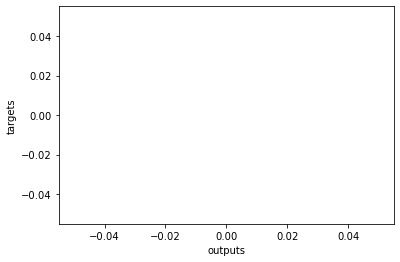

In [48]:
out = sess.run([outputs],
               feed_dict = {inputs: training_data['inputs']})

plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()


